In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, precision_recall_curve, auc, classification_report
)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
import joblib

In [ ]:
df = pd.read_csv('PDFMalware2022.csv')

In [ ]:
df.head()

,Unnamed: 0,FileName,PdfSize,MetadataSize,Pages,XrefLength,TitleCharacters,isEncrypted,EmbeddedFiles,Images,...,AA,OpenAction,Acroform,JBIG2Decode,RichMedia,Launch,EmbeddedFile,XFA,Colors,Class
0,0,aedaf3c5428a2e3ba600c44b96ad78dfdf8ed76e7df129...,8.0,180.0,1.0,11.0,0.0,0.0,0.0,0,...,0,1,0,0,0,0,0,0,0.0,Malicious
1,1,fe767fb2584a10c010626263ea950643ac25f6ca24628f...,15.0,224.0,0.0,20.0,7.0,0.0,0.0,0,...,0,0,1,0,0,0,8,1,0.0,Malicious
2,2,544c5223ee301affad514b6fa585b3191625aba0a7222b...,4.0,468.0,2.0,13.0,16.0,0.0,0.0,0,...,0,1,0,0,0,0,0,0,0.0,Malicious
3,3,669772e626deccb9cfb7eb6a61e13d248d0ea08f1abe15...,17.0,250.0,1.0,15.0,0.0,0.0,0.0,0,...,0,1,1,0,0,0,0,0,0.0,Malicious
4,4,e434c884f45a691b0bf33d765f61794007eb0b8bb9f590...,7.0,252.0,3.0,16.0,45.0,0.0,0.0,0,...,0,1,0,0,0,0,0,0,0.0,Malicious


In [ ]:
df.shape

(10023, 34)

In [ ]:
df['Class'].value_counts()

,count
Class,
Malicious,5555
Benign,4468


In [ ]:
df.describe(include='all')

,Unnamed: 0,FileName,PdfSize,MetadataSize,Pages,XrefLength,TitleCharacters,isEncrypted,EmbeddedFiles,Images,...,AA,OpenAction,Acroform,JBIG2Decode,RichMedia,Launch,EmbeddedFile,XFA,Colors,Class
count,10023.000000,10023,10023.000000,10023.000000,10023.000000,10023.000000,10023.000000,10023.000000,10023.000000,10023,...,10023,10023,10023,10023,10023,10023,10023,10023,10023.000000,10023
unique,NaN,10023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89,...,40,8,10,16,7,5,19,7,NaN,2
top,NaN,b76c4910d7c637f32ebf175247d489a311c2a584a1ac6d...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,...,0,0,0,0,0,0,0,0,NaN,Malicious
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6458,...,8964,6393,6432,9320,9417,9339,8644,8953,NaN,5555
mean,5013.439290,NaN,87.225581,334.130101,3.398583,2728.630650,51.487479,-0.020852,-0.006485,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.087000,NaN
std,2894.317621,NaN,444.239972,1566.007897,11.903610,18108.388189,1354.775001,0.206809,0.257123,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.178074,NaN
min,0.000000,NaN,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.000000,NaN
25%,2508.500000,NaN,9.000000,180.000000,1.000000,12.000000,0.000000,0.000000,0.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
50%,5014.000000,NaN,36.000000,265.000000,1.000000,21.000000,0.000000,0.000000,0.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
75%,7519.500000,NaN,80.000000,319.000000,2.000000,77.000000,13.000000,0.000000,0.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10023 entries, 0 to 10022
Data columns (total 34 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       10023 non-null  int64  
 1   FileName         10023 non-null  object 
 2   PdfSize          10023 non-null  float64
 3   MetadataSize     10023 non-null  float64
 4   Pages            10023 non-null  float64
 5   XrefLength       10023 non-null  float64
 6   TitleCharacters  10023 non-null  float64
 7   isEncrypted      10023 non-null  float64
 8   EmbeddedFiles    10023 non-null  float64
 9   Images           10023 non-null  object 
 10  Text             10023 non-null  object 
 11  Header           10023 non-null  object 
 12  Obj              10023 non-null  object 
 13  Endobj           10023 non-null  object 
 14  Stream           10023 non-null  float64
 15  Endstream        10023 non-null  object 
 16  Xref             10023 non-null  object 
 17  Trailer     

### Looking into the columns with datatype: object

In [ ]:
df.select_dtypes(include=['object']).columns.tolist()

['FileName',
 'Images',
 'Text',
 'Header',
 'Obj',
 'Endobj',
 'Endstream',
 'Xref',
 'StartXref',
 'PageNo',
 'JS',
 'Javascript',
 'AA',
 'OpenAction',
 'Acroform',
 'JBIG2Decode',
 'RichMedia',
 'Launch',
 'EmbeddedFile',
 'XFA',
 'Class']

In [ ]:
df.FileName.str.len().value_counts()
# Analyze the distribution of file name lengths in the dataset.
# Unusual patterns, like very short or long file names, may indicate data issues.

,count
FileName,
64,10012
69,11


In [ ]:
df['Images'] = df['Images'].astype('category')
df['Images'].cat.categories

Index(['-1', '0', '1', '1(1)', '10', '107', '109', '11', '111', '12', '126',
       '13', '14', '15', '16', '17', '172', '18', '19', '2', '20', '207', '21',
       '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32',
       '33', '34', '35', '36', '369', '37', '38', '39', '4', '40', '41', '42',
       '43', '44', '45', '46', '47', '48', '5', '50', '52', '54', '56', '57',
       '58', '592', '6', '60', '61', '62', '66', '68', '7', '71', '72', '75',
       '76', '78', '79', '8', '81', '83', '84', '86', '88', '89', '898', '9',
       '90', '92', '94', '95', '97', '99'],
      dtype='object')

In [ ]:
df['Images'].value_counts()
# print(df['Images'].value_counts().to_string()) for full count
# 6458 files are there with no image embedded

,count
Images,
0,6458
1,1394
-1,851
2,182
3,121
...,...
83,1
79,1
898,1


In [ ]:
df.Text.value_counts()
# yes - contains text
# no - does not contain

,count
Text,
No,5398
Yes,3761
unclear,549
-1,302
0,13


In [ ]:
#Distribution of Text labels 'unclear', '-1' and '0' for the Malicious and Benign labels
df.loc[(df.Text == 'unclear') | (df.Text == '-1') | (df.Text == '0'), 'Class'].value_counts()

,count
Class,
Malicious,859
Benign,5


In [ ]:
#Taking a look at the PDF headers
df['Header'] = df['Header'].astype('category')
df['Header'].cat.categories
# pdf strings of the correct format - '%PDF-1.0'
# '\t%PDF-1.3%ï' - intended mimic real headers - maybe malicious

Index(['\t%PDF-0.9', '\t%PDF-1.', '\t%PDF-1."', '\t%PDF-1.0', '\t%PDF-1.0"',
       '\t%PDF-1.0\\n', '\t%PDF-1.1', '\t%PDF-1.1"', '\t%PDF-1.2',
       '\t%PDF-1.2"', '\t%PDF-1.3', '\t%PDF-1.3"', '\t%PDF-1.3%ï',
       '\t%PDF-1.344', '\t%PDF-1.3\\n', '\t%PDF-1.4', '\t%PDF-1.4"',
       '\t%PDF-1.4\\n', '\t%PDF-1.5', '\t%PDF-1.5"', '\t%PDF-1.544',
       '\t%PDF-1.6', '\t%PDF-1.6"', '\t%PDF-1.6%â', '\t%PDF-1.7',
       '\t%PDF-1.7"', '\t%PDF-1.8', '\t%PDF-11113', '\t%PDF-11311',
       '\t%PDF-13131', '\t%PDF-2.4', '\t%PDF-2.4"', '\t%PDF-\\\\x07',
       '\t%PDF-\x00.4', '\t%PDF-\x07.3', '\t%PDF-aaa', '\t%PDF-aaa"',
       '\t/bin/sh: 1: Syntax error: "(" unexpected',
       '\t/bin/sh: 1: Syntax error: Unterminated quoted string',
       '\t/bin/sh: 1: _Cunningham_Studio.pdf: not found', '\t2]',
       '\tError opening file /mnt/hgfs/kali_stuff/CLEAN_PDF_9000_files/Albert_Berger',
       '\tError opening file /mnt/hgfs/kali_stuff/CLEAN_PDF_9000_files/Inheritances',
       '\t[Errno 2] 

In [ ]:
df.Obj.value_counts()
# print all the values - print(df['Obj'].value_counts().to_string())
# 1,182 PDFs have 9 objects in them.
# 770 PDFs have an Obj value of -1, which is invalid in a real PDF.


,count
Obj,
9,1182
-1,770
8,722
11,414
6,411
...,...
662,1
223,1
322,1


In [ ]:
#The count of each unique non-digit value in the 'Obj' column
df.loc[(~df.Obj.str.isdigit()), 'Obj'].value_counts()

,count
Obj,
-1,770
(most,22
_Pro_Rodeo_Pix_,1
_Pro_Rodeo_Pix_',1


In [ ]:
df.loc[df['Obj'].isin(['-1', '(most', '_Pro_Rodeo_Pix_', "_Pro_Rodeo_Pix_'"]), 'Class'].value_counts()


,count
Class,
Malicious,761
Benign,33


In [ ]:
#Endobj is a keyword used in PDF files to mark the end of an object
#Objects are the basic building blocks of a PDF file, and they can contain various types of data, such as text, images, and fonts.
df.Endobj.value_counts()

,count
Endobj,
9,1171
8,619
-1,514
6,476
11,415
...,...
226,1
1193,1
957,1


In [ ]:
#Keywords that denote the end of the streams. Streams often contain text and are contained inside objects.
df.Endstream.value_counts()

,count
Endstream,
2,1966
3,1304
1,1008
-1,519
9,360
...,...
201,1
494,1
222,1


In [ ]:
df.loc[(~df.Endstream.str.isdigit()), 'Endstream'].value_counts()
# returns count of those who are not digits


,count
Endstream,
-1,519
pdfHeader),22
1(1),1


In [ ]:
df.loc[~df.Endstream.str.isdigit(), ['Endstream', 'Class']].value_counts().reset_index(name='count')


,Endstream,Class,count
0,-1,Malicious,486
1,-1,Benign,33
2,pdfHeader),Malicious,22
3,1(1),Malicious,1


In [ ]:
#The XRef table is an essential part of a PDF file, as it allows the PDF reader to quickly and efficiently find and access any object in the file.
#The XRef table can also contain information about compressed objects and encrypted objects.

#This code presents an outline for the number of Xref tables
df.Xref.value_counts()


,count
Xref,
1,4545
2,2525
0,1967
-1,519
3,191
4,163
6,42
pdfid.py,22
5,12


In [ ]:
#Number of keywords with ”startxref” which denotes where the Xref table is started.
df.StartXref.value_counts()



,count
StartXref,
1,5065
2,2812
0,629
3,620
-1,519
4,206
5,88
6,25
bytes[endHeader],22


In [ ]:
#Common non-numeric page numbers in the dataset
df.loc[~df.PageNo.str.isdigit(), 'PageNo'].value_counts().head(10)

,count
PageNo,
-1,519
1(1),104
list,22
2(1),5
2(2),4
53(2),1
5(1),1


In [ ]:
#Number of objects containing Javascript code.
#The code selects all rows where the JS column is one of the following values: -1, 1(1), 2(2), or 29(2).
#It then counts the number of occurrences of each unique value in the Class column for the selected rows.
df.loc[df.JS.isin(['-1', '1(1)', '2(2)', '29(2)']), 'Class'].value_counts()

,count
Class,
Malicious,737
Benign,33


In [ ]:
df[df.select_dtypes(include='object').apply(lambda x: x.str.contains('[()]|>', regex=True)).any(axis=1)]['Class'].value_counts()

# checks whether each element in the column contains any of the characters '(', ')', or '>' for 'Class'

,count
Class,
Malicious,373


In [ ]:
#Count of each unique 'Class' value (e.g., 'Malicious', 'Benign') for the rows where any of the string columns contain -1
df.loc[df.select_dtypes(include='category').apply(lambda x: x == '-1').any(axis=1)]['Class'].value_counts()

,count
Class,
Malicious,848
Benign,16


In [ ]:
#Number of AA keywords "OpenAction": Specifies a specific action upon an event.

df.loc[~df.AA.str.isdigit(), ['AA', 'Class']].value_counts().reset_index(name='count')

,AA,Class,count
0,-1,Malicious,521
1,-1,Benign,33
2,1(1),Malicious,14


In [ ]:
#Number of OpenAction keywords: Specifies a specific action upon opening the PDF file.
#OpenAction could be used to automatically open a document to a specific page or to zoom to a specific magnification level.
#OpenAction can also be used to execute malicious code such as Javascript that downloads and installs malware.

df.loc[~df.OpenAction.str.isdigit(), ['OpenAction', 'Class']].value_counts().reset_index(name='count')


,OpenAction,Class,count
0,-1,Malicious,521
1,1(1),Malicious,87
2,-1,Benign,33
3,12(2),Malicious,1


In [ ]:
#Number of Acroform tags: Acrobat forms are PDF files containing form fields that support scripting technologies that can be misused for attackers.

df.loc[~df.Acroform.str.isdigit(), ['Acroform', 'Class']].value_counts().reset_index(name='count')


,Acroform,Class,count
0,-1,Malicious,521
1,-1,Benign,33
2,1(1),Malicious,13


In [ ]:
#Presence of JBig2Decode filter: JBig2Decode is a common filter to encode malicious content.

df.loc[~df.JBIG2Decode.str.isdigit(), ['JBIG2Decode', 'Class']].value_counts().reset_index(name='count')

,JBIG2Decode,Class,count
0,-1,Malicious,521
1,-1,Benign,33
2,1(1),Malicious,6


In [ ]:
#RichMedia: Number of RichMedia keywords which denotes the number of embedded media and flash files.
df.loc[~df.RichMedia.str.isdigit(), ['RichMedia', 'Class']].value_counts().reset_index(name='count')


,RichMedia,Class,count
0,-1,Malicious,521
1,-1,Benign,33
2,1(1),Malicious,3
3,2(2),Malicious,1


In [ ]:
#Number of Launch keywords: Launch is a keyword that can be used to execute a command or program.
df.loc[~df.Launch.str.isdigit(), ['Launch', 'Class']].value_counts().reset_index(name='count')

,Launch,Class,count
0,-1,Malicious,521
1,-1,Benign,33
2,1(1),Malicious,10


In [ ]:
#This column is unclear as to whether it represents the number of embedded files or the average size of all the embedded media.

df.loc[~df.EmbeddedFile.str.isdigit(), ['EmbeddedFile', 'Class']].value_counts().reset_index(name='count')


,EmbeddedFile,Class,count
0,-1,Malicious,521
1,-1,Benign,33
2,1(1),Malicious,32
3,12(2),Malicious,1


In [ ]:
#XFA: XFAs are XML Form Architecture included in certain PDF 40 files that support scripting technologies that can be misused for attackers.

df.loc[~df.XFA.str.isdigit(), ['XFA', 'Class']].value_counts().reset_index(name='count')

,XFA,Class,count
0,-1,Malicious,521
1,-1,Benign,33
2,1(1),Malicious,20


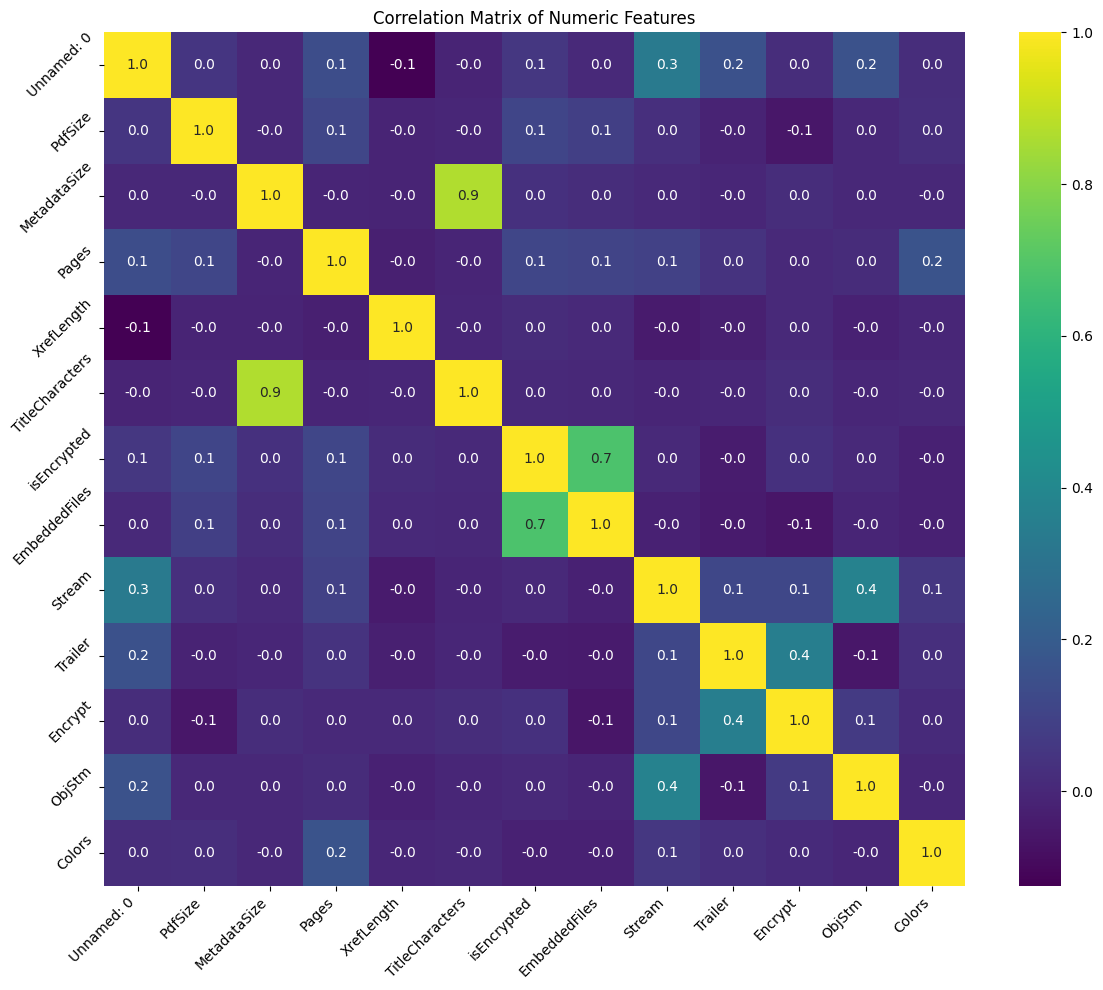

In [ ]:
correlation_matrix = df.select_dtypes(include=['float64', 'int64']).corr()

# Plotting correlation matrix heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".1f")
plt.title('Correlation Matrix of Numeric Features')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()


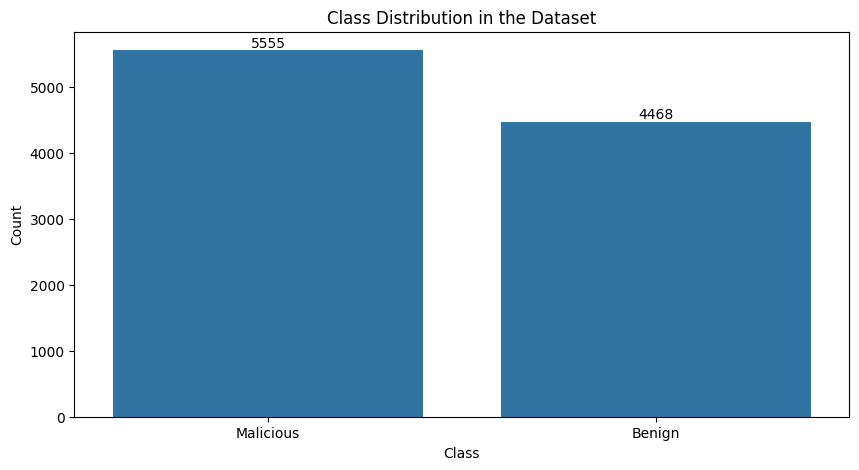

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))

# Create the countplot
ax = sns.countplot(data=df, x='Class')

# Add count values on top of each bar
for p in ax.patches:
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    count = int(y)
    ax.text(x, y + 0.5, count, ha='center', va='bottom')

plt.title('Class Distribution in the Dataset')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

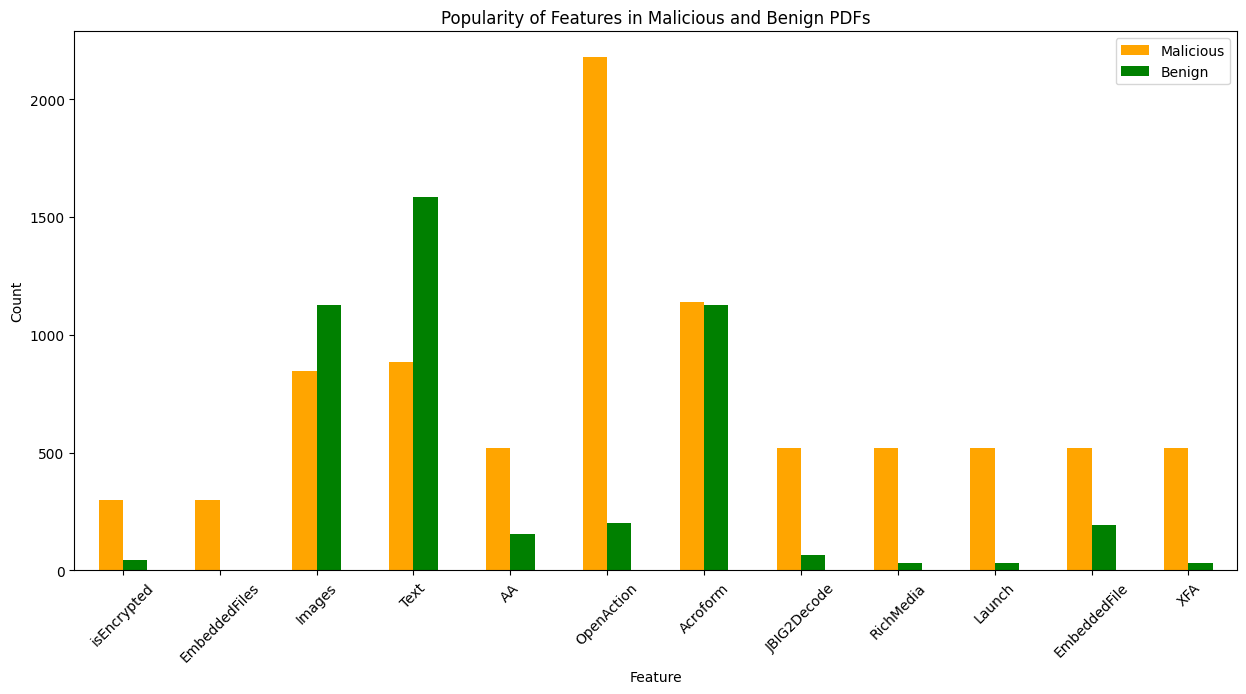

In [ ]:
# Selecting a subset of features to analyze for popularity
# These features are binary or categorical, making them suitable for this analysis
features_to_analyze = ['isEncrypted', 'EmbeddedFiles', 'Images', 'Text', 'AA', 'OpenAction', 'Acroform',
                       'JBIG2Decode', 'RichMedia', 'Launch', 'EmbeddedFile', 'XFA']

# Creating a DataFrame to store the counts of each feature for both Malicious and Benign PDFs
feature_counts = pd.DataFrame(index=features_to_analyze, columns=['Malicious', 'Benign'])

# Calculating the counts for each feature
for feature in features_to_analyze:
    malicious_counts = df.loc[df['Class'] == 'Malicious', feature].value_counts()
    benign_counts = df.loc[df['Class'] == 'Benign', feature].value_counts()

    malicious_count = malicious_counts.iloc[1] if len(malicious_counts) > 1 else 0
    benign_count = benign_counts.iloc[1] if len(benign_counts) > 1 else 0

    feature_counts.loc[feature, 'Malicious'] = malicious_count
    feature_counts.loc[feature, 'Benign'] = benign_count

# Plotting the counts with specific colors for Malicious (Red) and Benign (Blue)
feature_counts.plot(kind='bar', figsize=(15, 7), color=['orange', 'green'])
plt.title('Popularity of Features in Malicious and Benign PDFs')
plt.xlabel('Feature')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

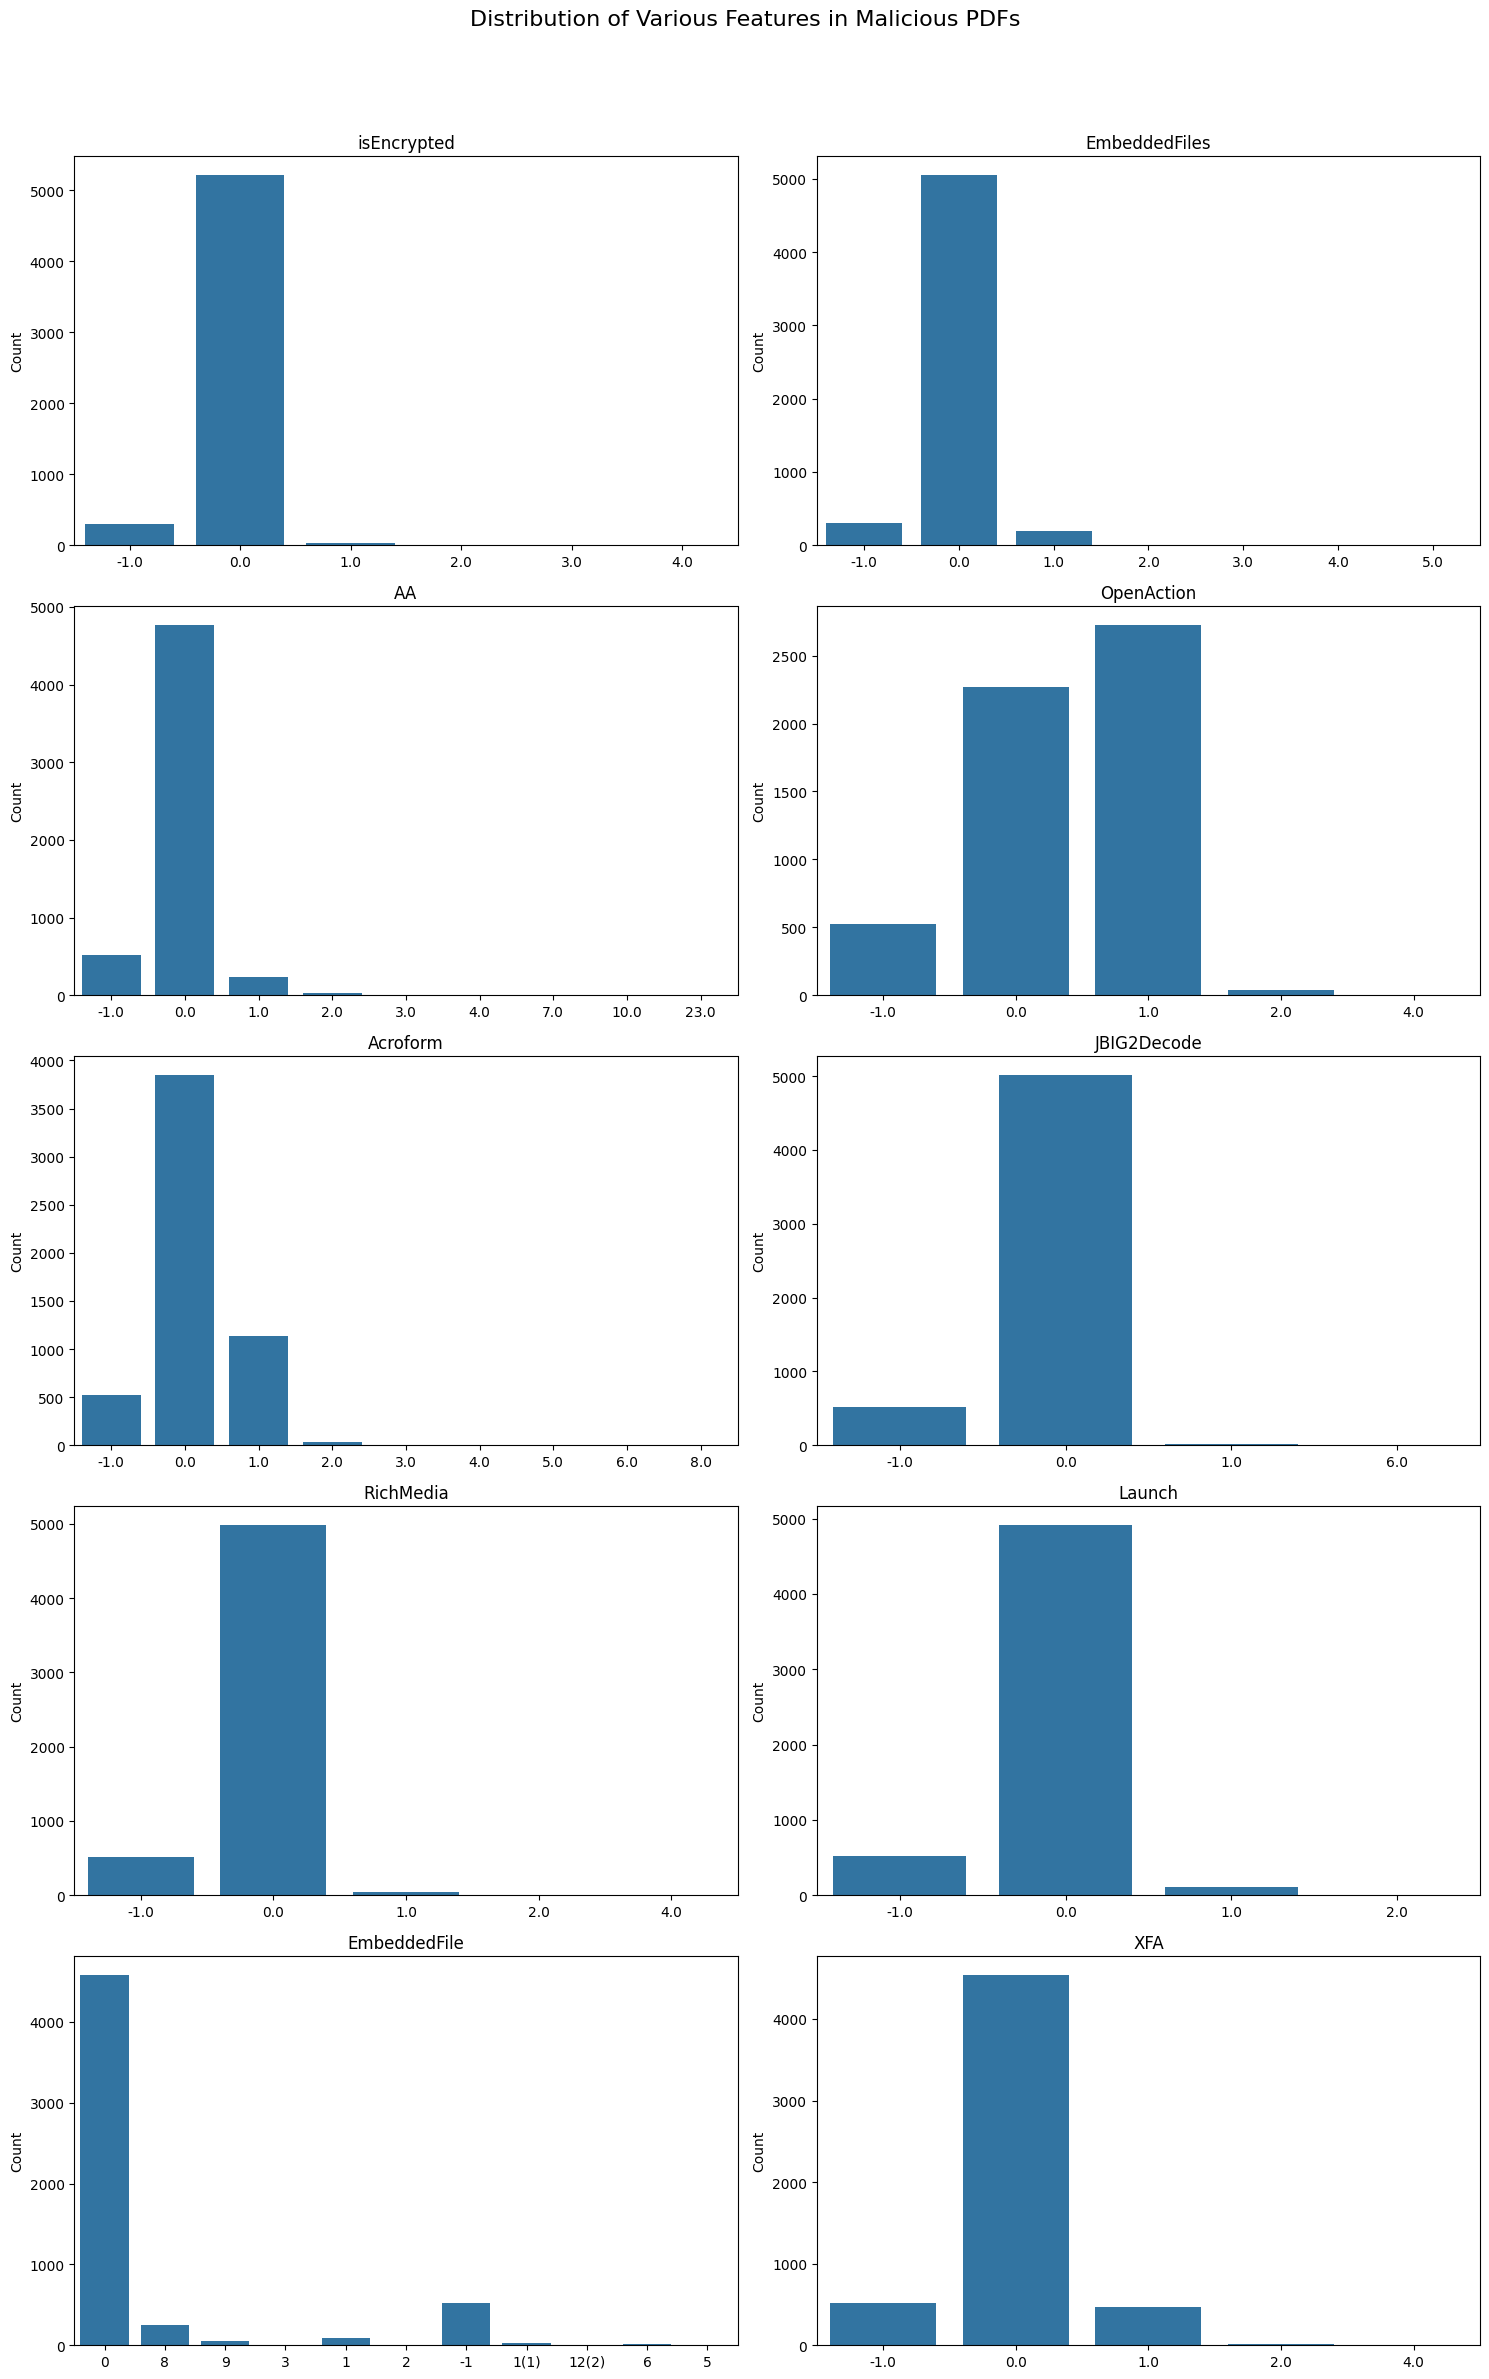

In [ ]:
# Convert categorical features to numeric where necessary
df['ImagesNumeric'] = pd.to_numeric(df['Images'], errors='coerce').fillna(0)
df['TextNumeric'] = df['Text'].apply(lambda x: 1 if x == 'Yes' else 0)
df['ClassNumeric'] = df['Class'].apply(lambda x: 1 if x == 'Malicious' else 0)

# Convert binary features to numeric
binary_features = ['AA', 'OpenAction', 'Launch', 'Acroform', 'JBIG2Decode', 'RichMedia', 'XFA']
for feature in binary_features:
    df[feature] = pd.to_numeric(df[feature], errors='coerce').fillna(0)

# Filter out malicious PDFs from the dataset
malicious_pdfs = df[df['Class'] == 'Malicious']

# Selecting a subset of features for visualization
# These are binary or have significant variation in malicious PDFs
features_for_visualization = ['isEncrypted', 'EmbeddedFiles', 'AA', 'OpenAction', 'Acroform',
                              'JBIG2Decode', 'RichMedia', 'Launch', 'EmbeddedFile', 'XFA']

# Creating multiple plots for each feature
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 25))
fig.suptitle('Distribution of Various Features in Malicious PDFs', fontsize=16)

for i, feature in enumerate(features_for_visualization):
    row = i // 2
    col = i % 2
    sns.countplot(x=feature, data=malicious_pdfs, ax=axes[row, col])
    axes[row, col].set_title(feature)
    axes[row, col].set_xlabel('')
    axes[row, col].set_ylabel('Count')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


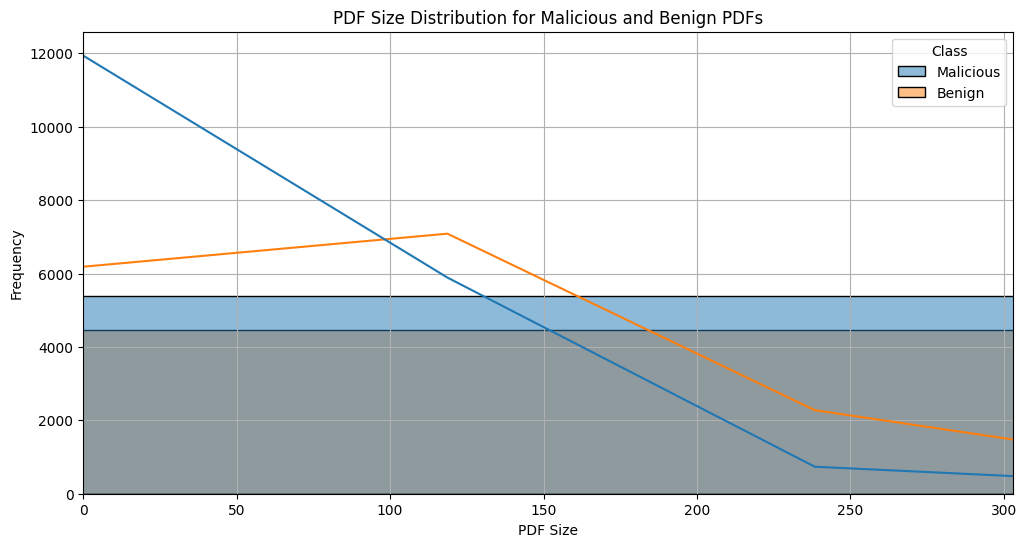

In [ ]:
# 1. PDF Size distribution for Malicious and Benign PDFs
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='PdfSize', hue='Class', bins=50, kde=True)
plt.title('PDF Size Distribution for Malicious and Benign PDFs')
plt.xlabel('PDF Size')
plt.ylabel('Frequency')
plt.xlim(0, df['PdfSize'].quantile(0.95))  # Limiting x-axis to 95th percentile for better visualization
plt.grid(True)
plt.show()

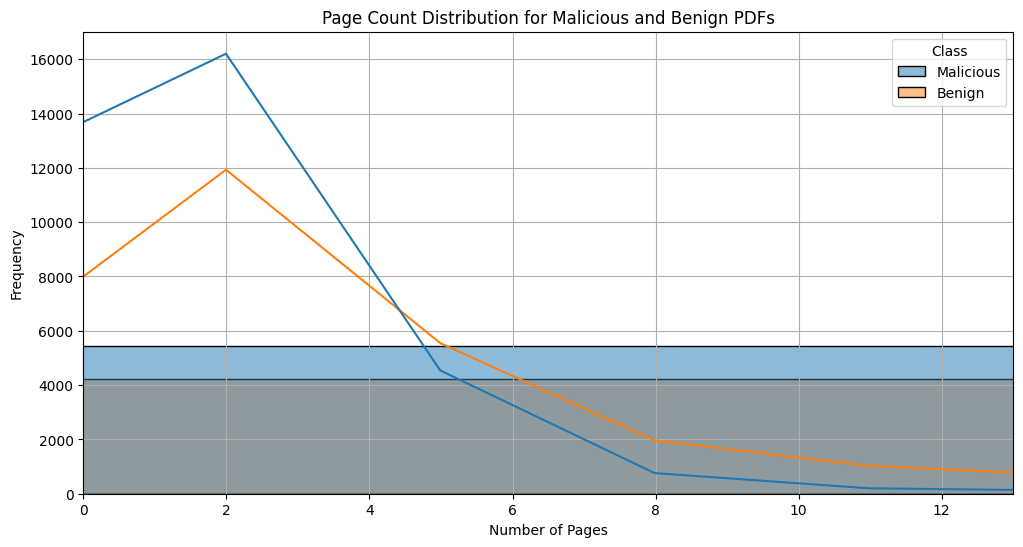

In [ ]:
# 2. Page Count distribution for Malicious and Benign PDFs
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Pages', hue='Class', bins=30, kde=True)
plt.title('Page Count Distribution for Malicious and Benign PDFs')
plt.xlabel('Number of Pages')
plt.ylabel('Frequency')
plt.xlim(0, df['Pages'].quantile(0.95))  # Limiting x-axis to 95th percentile for better visualization
plt.grid(True)
plt.show()

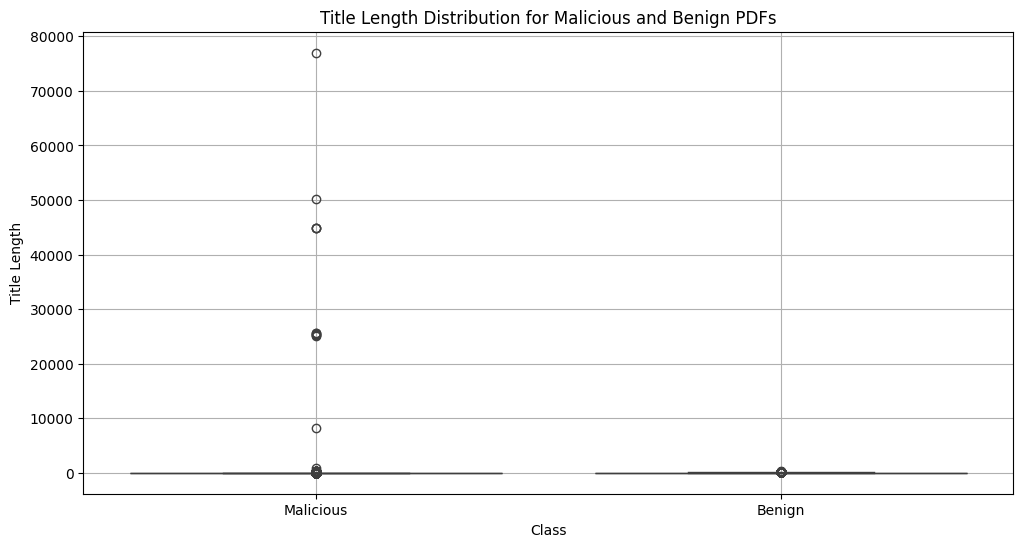

In [ ]:
# 3. Title Length distribution for Malicious and Benign PDFs
plt.figure(figsize=(12, 6))
sns.boxplot(x='Class', y='TitleCharacters', data=df)
plt.title('Title Length Distribution for Malicious and Benign PDFs')
plt.xlabel('Class')
plt.ylabel('Title Length')
plt.grid(True)
plt.show()

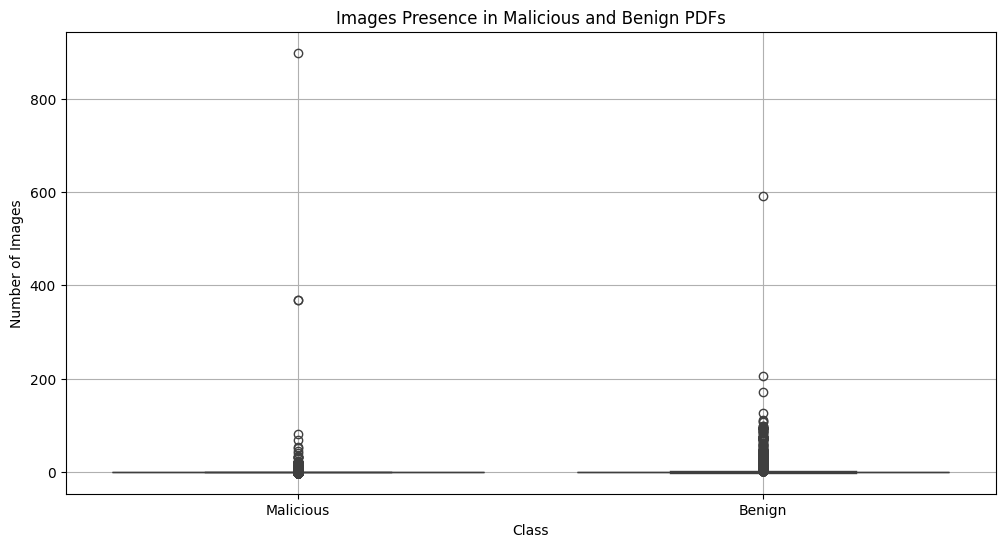

In [ ]:
# 4. Images presence in Malicious and Benign PDFs
# Converting 'Images' to numeric for visualization purposes
df['ImagesNumeric'] = pd.to_numeric(df['Images'], errors='coerce').fillna(0)
plt.figure(figsize=(12, 6))
sns.boxplot(x='Class', y='ImagesNumeric', data=df)
plt.title('Images Presence in Malicious and Benign PDFs')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.grid(True)
plt.show()

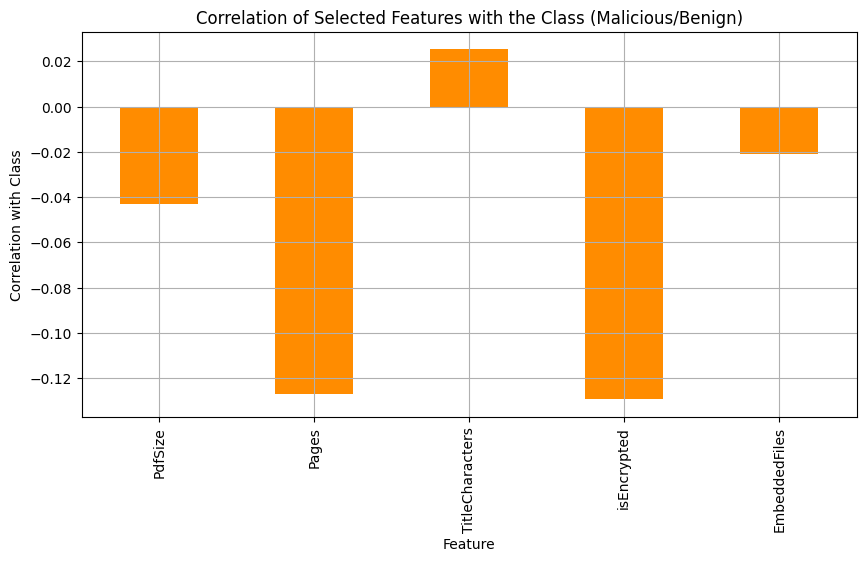

In [ ]:
# 5. Correlation of selected features with the Class (Malicious/Benign)
# For this, we need to convert the Class to numeric
df['ClassNumeric'] = df['Class'].apply(lambda x: 1 if x == 'Malicious' else 0)
selected_features = ['PdfSize', 'Pages', 'TitleCharacters', 'isEncrypted', 'EmbeddedFiles', 'ClassNumeric']
correlation_with_class = df[selected_features].corr()['ClassNumeric'][:-1]  # Exclude self-correlation
correlation_with_class.plot(kind='bar', figsize=(10, 5), color='darkorange')
plt.title('Correlation of Selected Features with the Class (Malicious/Benign)')
plt.xlabel('Feature')
plt.ylabel('Correlation with Class')
plt.grid(True)
plt.show()

### Preprocessing Part

In [ ]:
def preprocess_pdf_malware_data(df):
    # 1. Drop unnecessary columns
    df = df.drop(['Unnamed: 0', 'FileName'], axis=1, errors='ignore')

    # 2. Replace -1 with NaN for all columns where -1 is invalid
    df.replace(-1, np.nan, inplace=True)

    # 3. Convert categorical features to numeric
    df['ImagesNumeric'] = pd.to_numeric(df['Images'], errors='coerce').fillna(0)
    df['TextNumeric'] = df['Text'].apply(lambda x: 1 if x == 'Yes' else 0)
    df['ClassNumeric'] = df['Class'].apply(lambda x: 1 if x == 'Malicious' else 0)

    # 4. Convert binary features to numeric
    binary_features = ['AA', 'OpenAction', 'Launch', 'Acroform', 'JBIG2Decode', 'RichMedia', 'XFA']
    for feature in binary_features:
        if feature in df.columns:
            df[feature] = pd.to_numeric(df[feature], errors='coerce').fillna(0)

    # 5. Select features
    selected_features = [
        'PdfSize', 'MetadataSize', 'Pages', 'TitleCharacters', 'isEncrypted',
        'EmbeddedFiles', 'ImagesNumeric', 'TextNumeric',
        'AA', 'OpenAction', 'Launch', 'Acroform',
        'JBIG2Decode', 'RichMedia', 'XFA'
    ]
    # Only keep columns that exist in the DataFrame
    selected_features = [f for f in selected_features if f in df.columns]
    X = df[selected_features].copy()
    y = df['ClassNumeric'].copy() if 'ClassNumeric' in df.columns else None

    # 6. Impute missing values (median for continuous, mode for binary)
    for col in X.columns:
        if X[col].dtype in [np.float64, np.int64]:
            X[col] = X[col].fillna(X[col].median())
        else:
            X[col] = X[col].fillna(X[col].mode()[0])


    return X, y


df = pd.read_csv('PDFMalware2022.csv')
X, y = preprocess_pdf_malware_data(df)

### Training and Evaluating


=== GridSearchCV: LogisticRegression ===
Best Params: {'C': 10, 'solver': 'lbfgs'}

=== GridSearchCV: RandomForest ===
Best Params: {'max_depth': 10, 'n_estimators': 100}

=== GridSearchCV: SVC ===
Best Params: {'C': 10, 'kernel': 'rbf'}

=== GridSearchCV: KNN ===
Best Params: {'n_neighbors': 7}

=== GridSearchCV: MLPClassifier ===
Best Params: {'alpha': 0.0001, 'hidden_layer_sizes': (50, 50)}


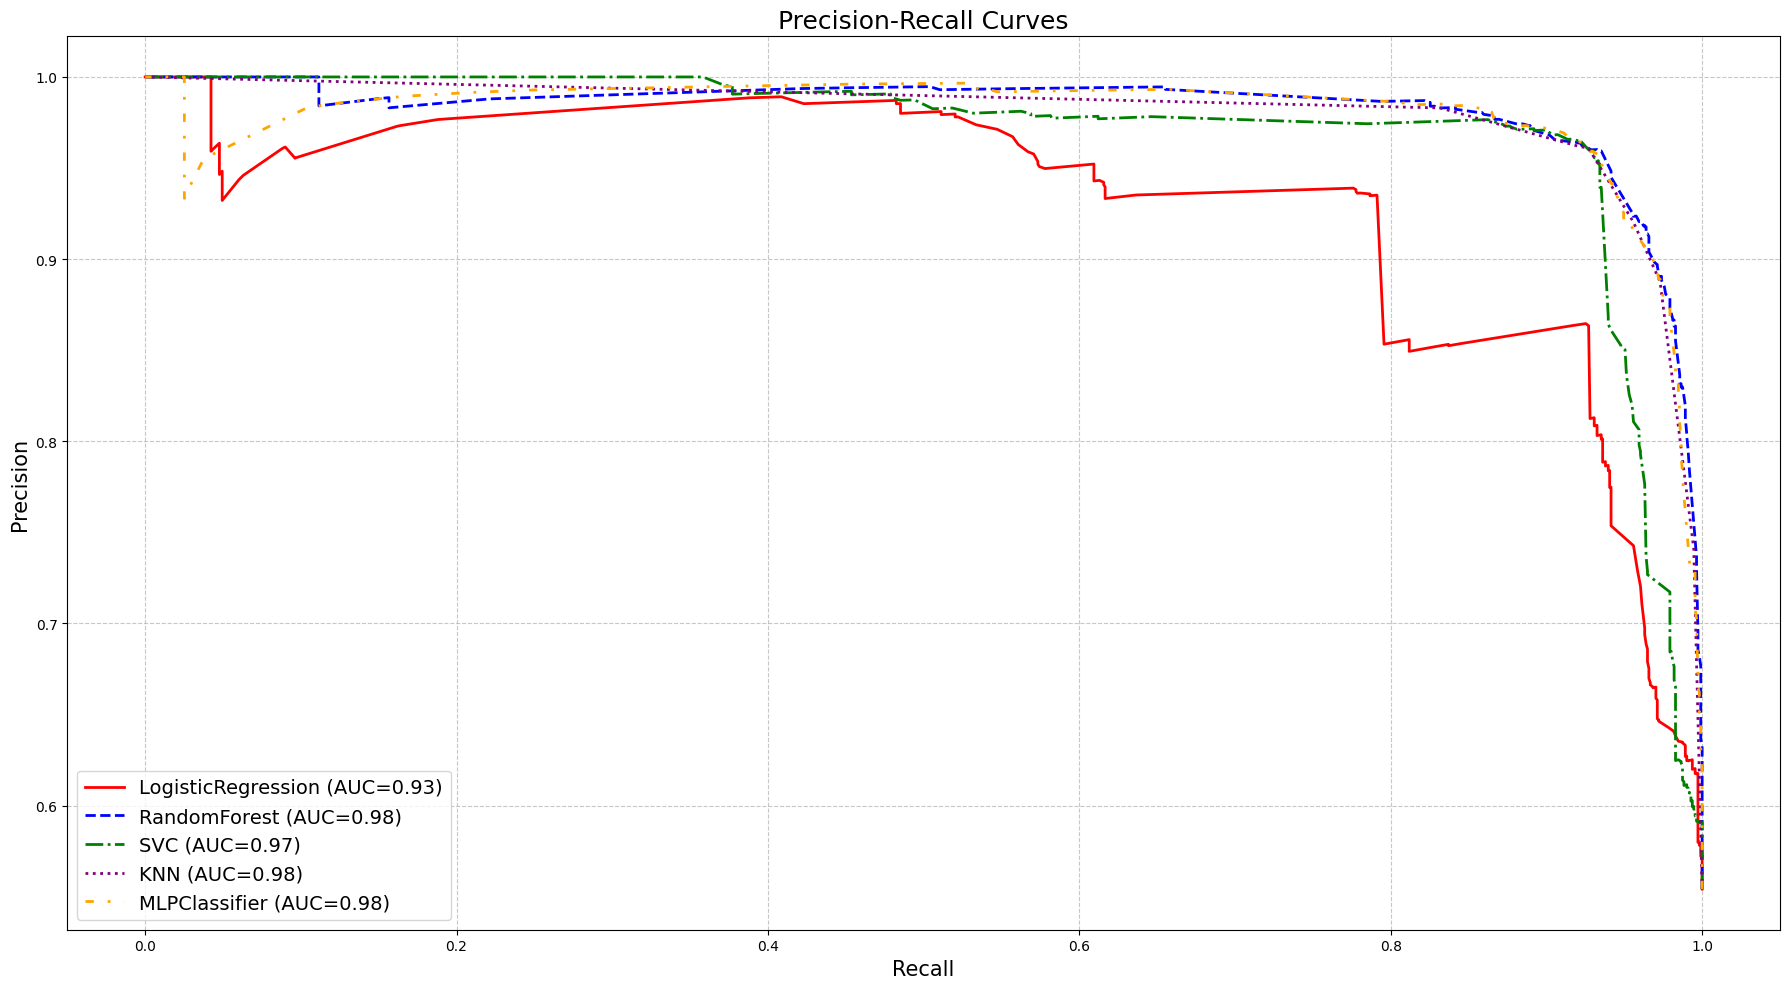


=== LogisticRegression ===
Best Validation AUC (PR): 0.9329102763420215
Accuracy: 0.8374
Precision: 0.8050
Recall: 0.9325
F1-score: 0.8641
Confusion Matrix:
 [[ 643  251]
 [  75 1036]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.72      0.80       894
           1       0.80      0.93      0.86      1111

    accuracy                           0.84      2005
   macro avg       0.85      0.83      0.83      2005
weighted avg       0.85      0.84      0.83      2005


=== RandomForest ===
Best Validation AUC (PR): 0.9826554475644533
Accuracy: 0.9421
Precision: 0.9594
Recall: 0.9352
F1-score: 0.9471
Confusion Matrix:
 [[ 850   44]
 [  72 1039]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.95      0.94       894
           1       0.96      0.94      0.95      1111

    accuracy                           0.94      2005
   macro avg       0.94      0.94      0.

In [ ]:
# 1. Data Preparation (Assume X, y are ready)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 2. Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3. Feature Selection (select best 10 features, adjust as needed)
selector = SelectKBest(score_func=f_classif, k=10)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)
selected_features = X.columns[selector.get_support()]

# 4. Model Definitions and Hyperparameter grids
models_and_params = {
    'LogisticRegression': (
        LogisticRegression(max_iter=1000),
        {'C': [0.01, 0.1, 1, 10], 'solver': ['lbfgs']}
    ),
    'RandomForest': (
        RandomForestClassifier(),
        {'n_estimators': [100, 200], 'max_depth': [None, 10, 20]}
    ),
    'SVC': (
        SVC(probability=True),
        {'C': [0.1, 1, 10], 'kernel': ['rbf', 'linear']}
    ),
    'KNN': (
        KNeighborsClassifier(),
        {'n_neighbors': [3, 5, 7]}
    ),
    'MLPClassifier': (
        MLPClassifier(max_iter=1000),
        {'hidden_layer_sizes': [(100,), (50, 50)], 'alpha': [0.0001, 0.01]}
    ),
}

results = {}
pr_curves = {}
best_models = {}

# 5. Hyperparameter Tuning, Training, and Evaluation
for name, (model, param_grid) in models_and_params.items():
    print(f"\n=== GridSearchCV: {name} ===")
    grid = GridSearchCV(model, param_grid, cv=3, scoring='f1', n_jobs=-1)
    grid.fit(X_train_selected, y_train)
    best_model = grid.best_estimator_
    best_models[name] = best_model
    print(f"Best Params: {grid.best_params_}")

    # Save model
    joblib.dump(best_model, f"{name}_pdf_malware_model.pkl")

    # Predict and evaluate
    y_pred = best_model.predict(X_test_selected)
    if hasattr(best_model, "predict_proba"):
        y_proba = best_model.predict_proba(X_test_selected)[:, 1]
    else:
        y_proba = best_model.decision_function(X_test_selected)
        y_proba = (y_proba - y_proba.min()) / (y_proba.max() - y_proba.min())  # scale to (0,1) if needed

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_proba)
    pr_auc = auc(recall_curve, precision_curve)
    pr_curves[name] = (recall_curve, precision_curve, pr_auc)

    results[name] = {
        'accuracy': acc,
        'precision': prec,
        'recall': rec,
        'f1_score': f1,
        'confusion_matrix': cm,
        'classification_report': classification_report(y_test, y_pred),
        'pr_auc': pr_auc
    }

# 6. Plot all PR curves on one plot with different colors
plt.figure(figsize=(18, 10))  # Large, clear plot

colors = ['red', 'blue', 'green', 'purple', 'orange', 'black']
linestyles = ['-', '--', '-.', ':', (0, (3, 5, 1, 5)), (0, (1, 1))]

for i, (name, (recall_curve, precision_curve, pr_auc)) in enumerate(pr_curves.items()):
    plt.plot(
        recall_curve, precision_curve,
        color=colors[i % len(colors)],
        linestyle=linestyles[i % len(linestyles)],
        label=f"{name} (AUC={pr_auc:.2f})",
        linewidth=2
    )

plt.title('Precision-Recall Curves', fontsize=18)
plt.xlabel('Recall', fontsize=15)
plt.ylabel('Precision', fontsize=15)
plt.legend(fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 7. Print metrics for all models
for name, metrics in results.items():
    print(f"\n=== {name} ===")
    print("Best Validation AUC (PR):", metrics['pr_auc'])
    print(f"Accuracy: {metrics['accuracy']:.4f}")
    print(f"Precision: {metrics['precision']:.4f}")
    print(f"Recall: {metrics['recall']:.4f}")
    print(f"F1-score: {metrics['f1_score']:.4f}")
    print("Confusion Matrix:\n", metrics['confusion_matrix'])
    print("Classification Report:\n", metrics['classification_report'])
